# **The IBM Employee Attrition Dataset**
Done by: Saja Abdalaal

# **Background Information**

Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition. Let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this IBM dataset.

# **Data**

In [420]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

------------------------------

Import train and test datasets

In [421]:
train_url = '/kaggle/input/employee/train.csv'
test_url = '/kaggle/input/employee/test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [422]:
test_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


Concatenating both train and test data to clean, preprocess and analyse the entire dataset

In [423]:
df=pd.concat([train_df.drop('Attrition',axis=1),test_df],axis=0) # dropped the target column

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1470 entries, 0 to 411

Data columns (total 34 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   Age                       1470 non-null   int64 

 1   BusinessTravel            1470 non-null   object

 2   DailyRate                 1470 non-null   int64 

 3   Department                1470 non-null   object

 4   DistanceFromHome          1470 non-null   int64 

 5   Education                 1470 non-null   int64 

 6   EducationField            1470 non-null   object

 7   EmployeeCount             1470 non-null   int64 

 8   EmployeeNumber            1470 non-null   int64 

 9   EnvironmentSatisfaction   1470 non-null   int64 

 10  Gender                    1470 non-null   object

 11  HourlyRate                1470 non-null   int64 

 12  JobInvolvement            1470 non-null   int64 

 13  JobLevel                  1470 non-null   int64 

 14  JobRol

# **Data preprocessing and EDA**

## Null values

In [425]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [426]:
train_df['Attrition'].isnull().sum()

0

No Null values!

-----------------------------

## Categorical attributes (Handling object columns)

In [427]:
df.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [428]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(include=['float64','int64'])


In [429]:
df_cat = pd.get_dummies(df_cat, drop_first=True)

## Drop irrelevant columns

In [430]:
# Concatnating num and cat dataframes
df_new = pd.concat([df_num, df_cat], axis=1)

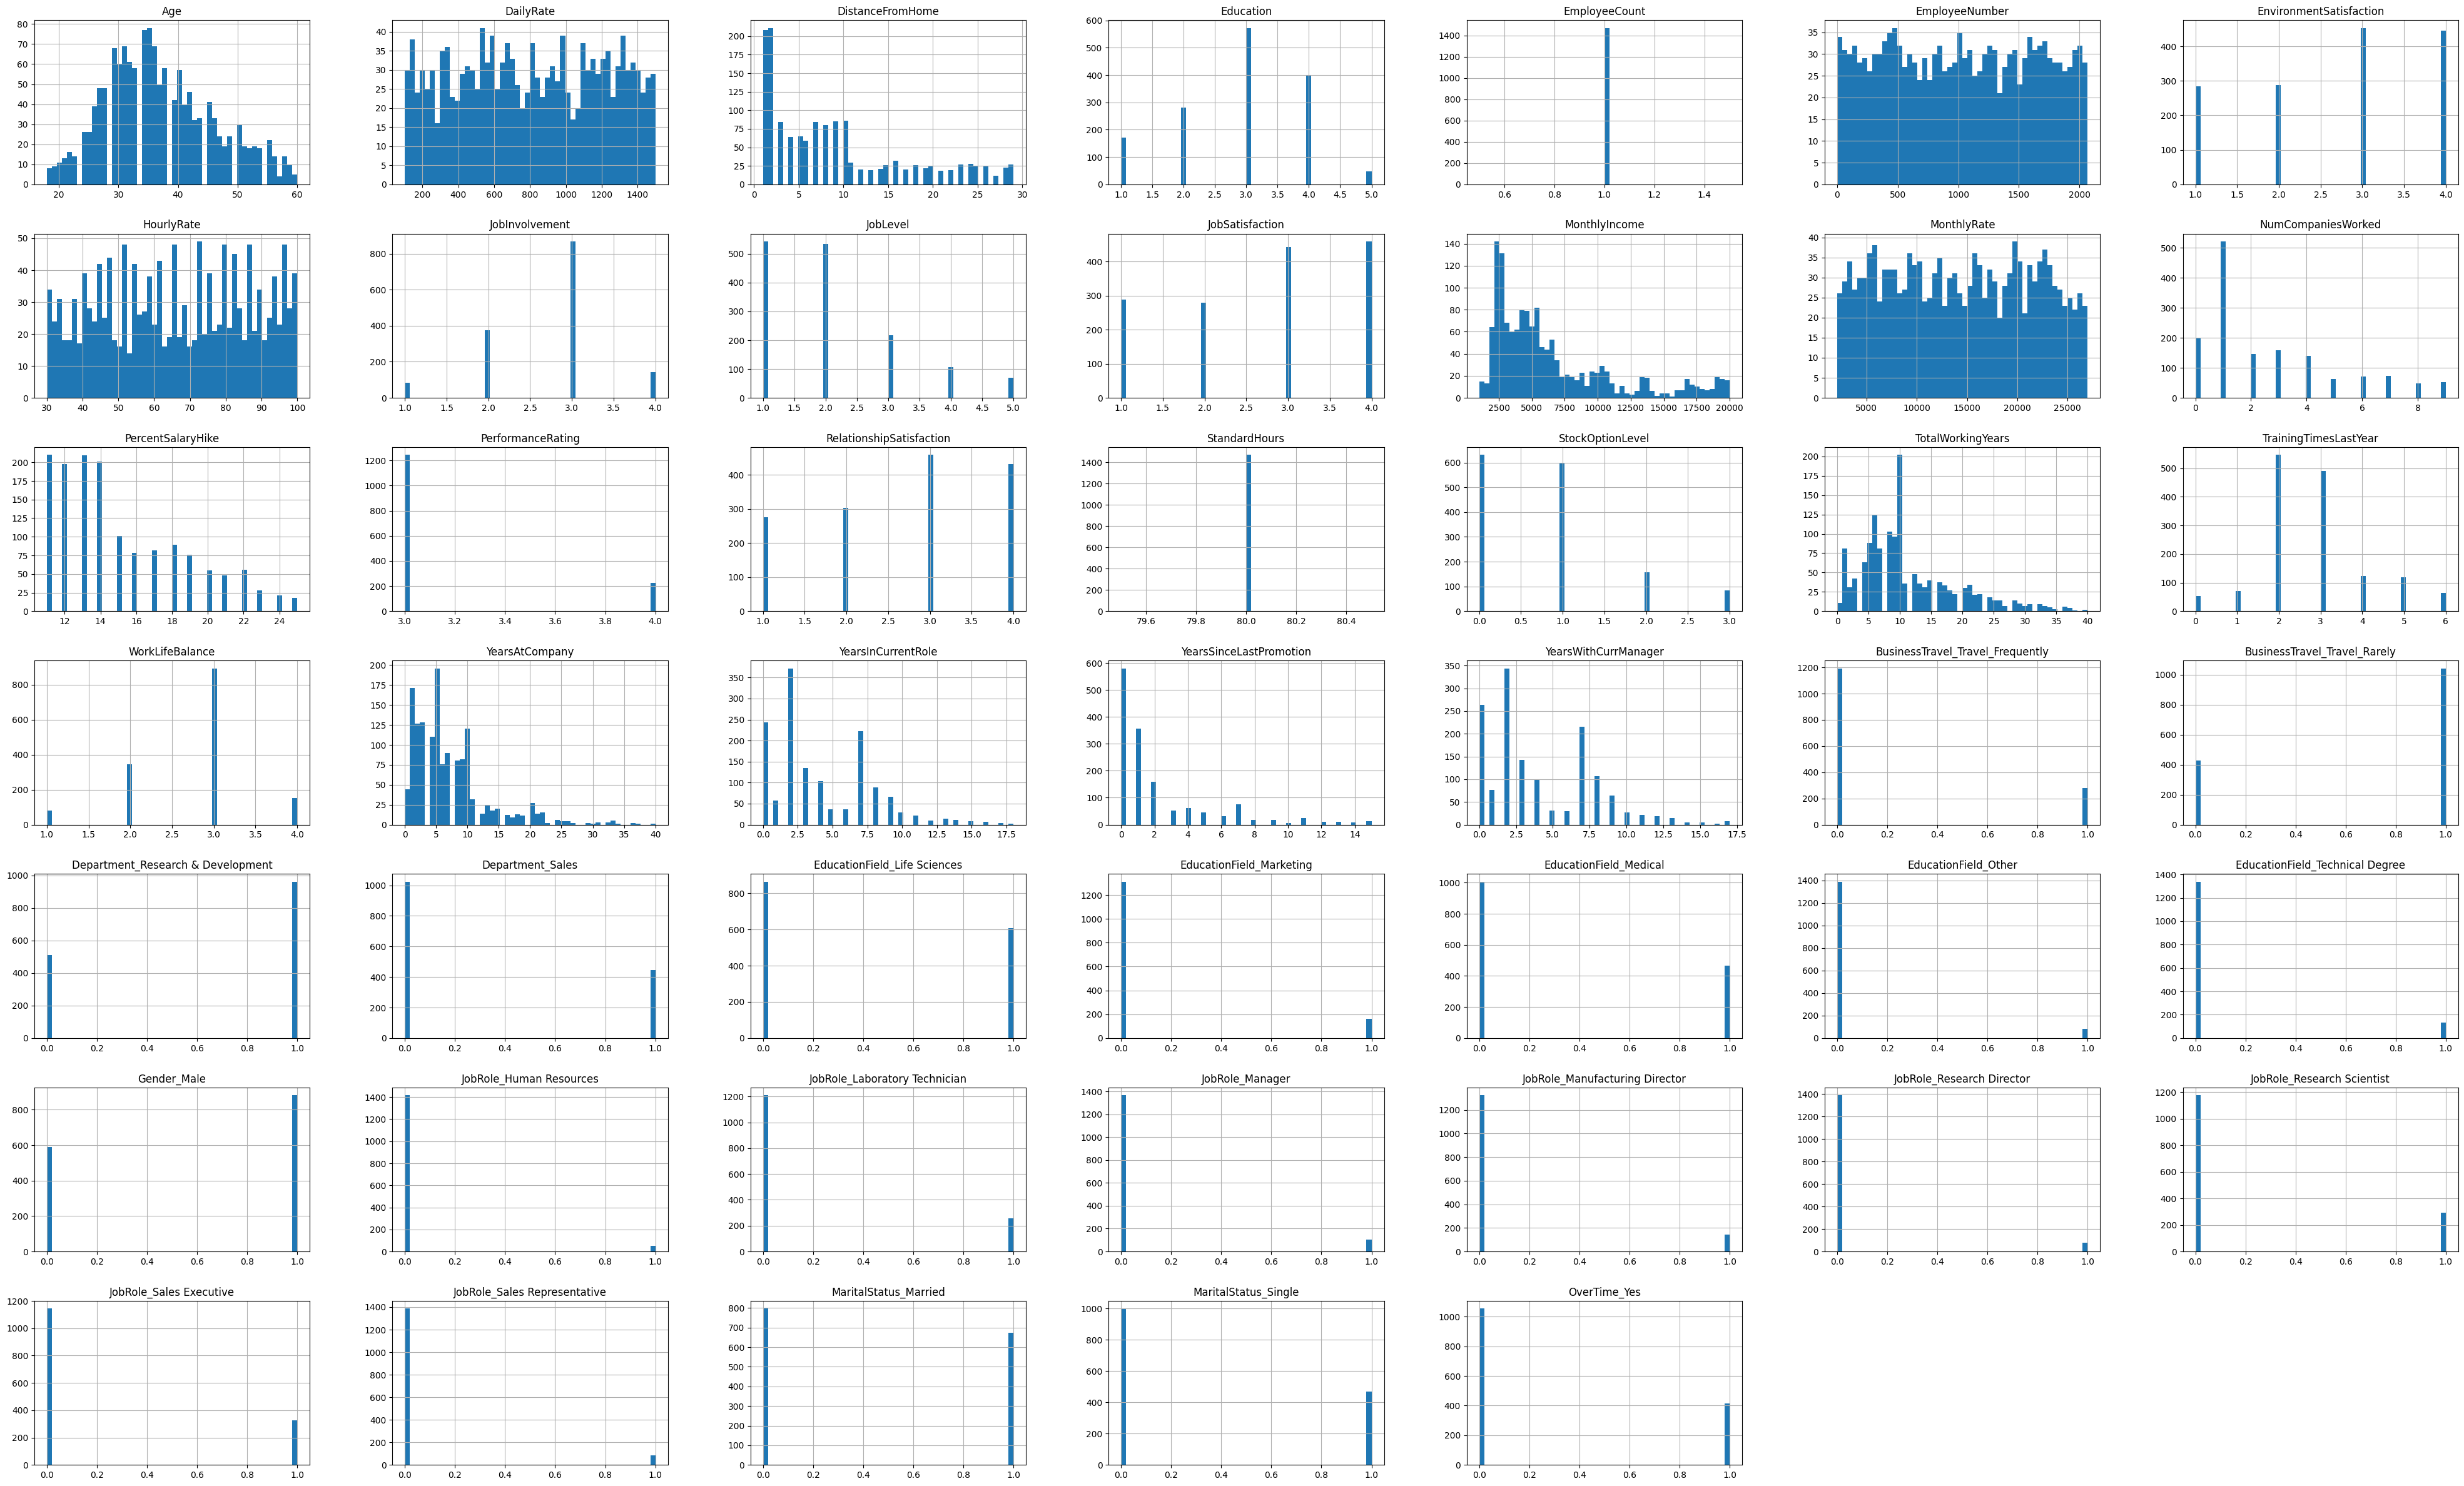

In [431]:
df_new.hist(bins=50, figsize=(50,30))
plt.show()

- From the above visualisation it can be observed that **EmployeeCount, and StandardHours** just include 1 value which wont make a difference in model and might act as noise so it can be dropped instead to build efficient model



In [432]:
df_new.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

## Correlation

<Axes: >

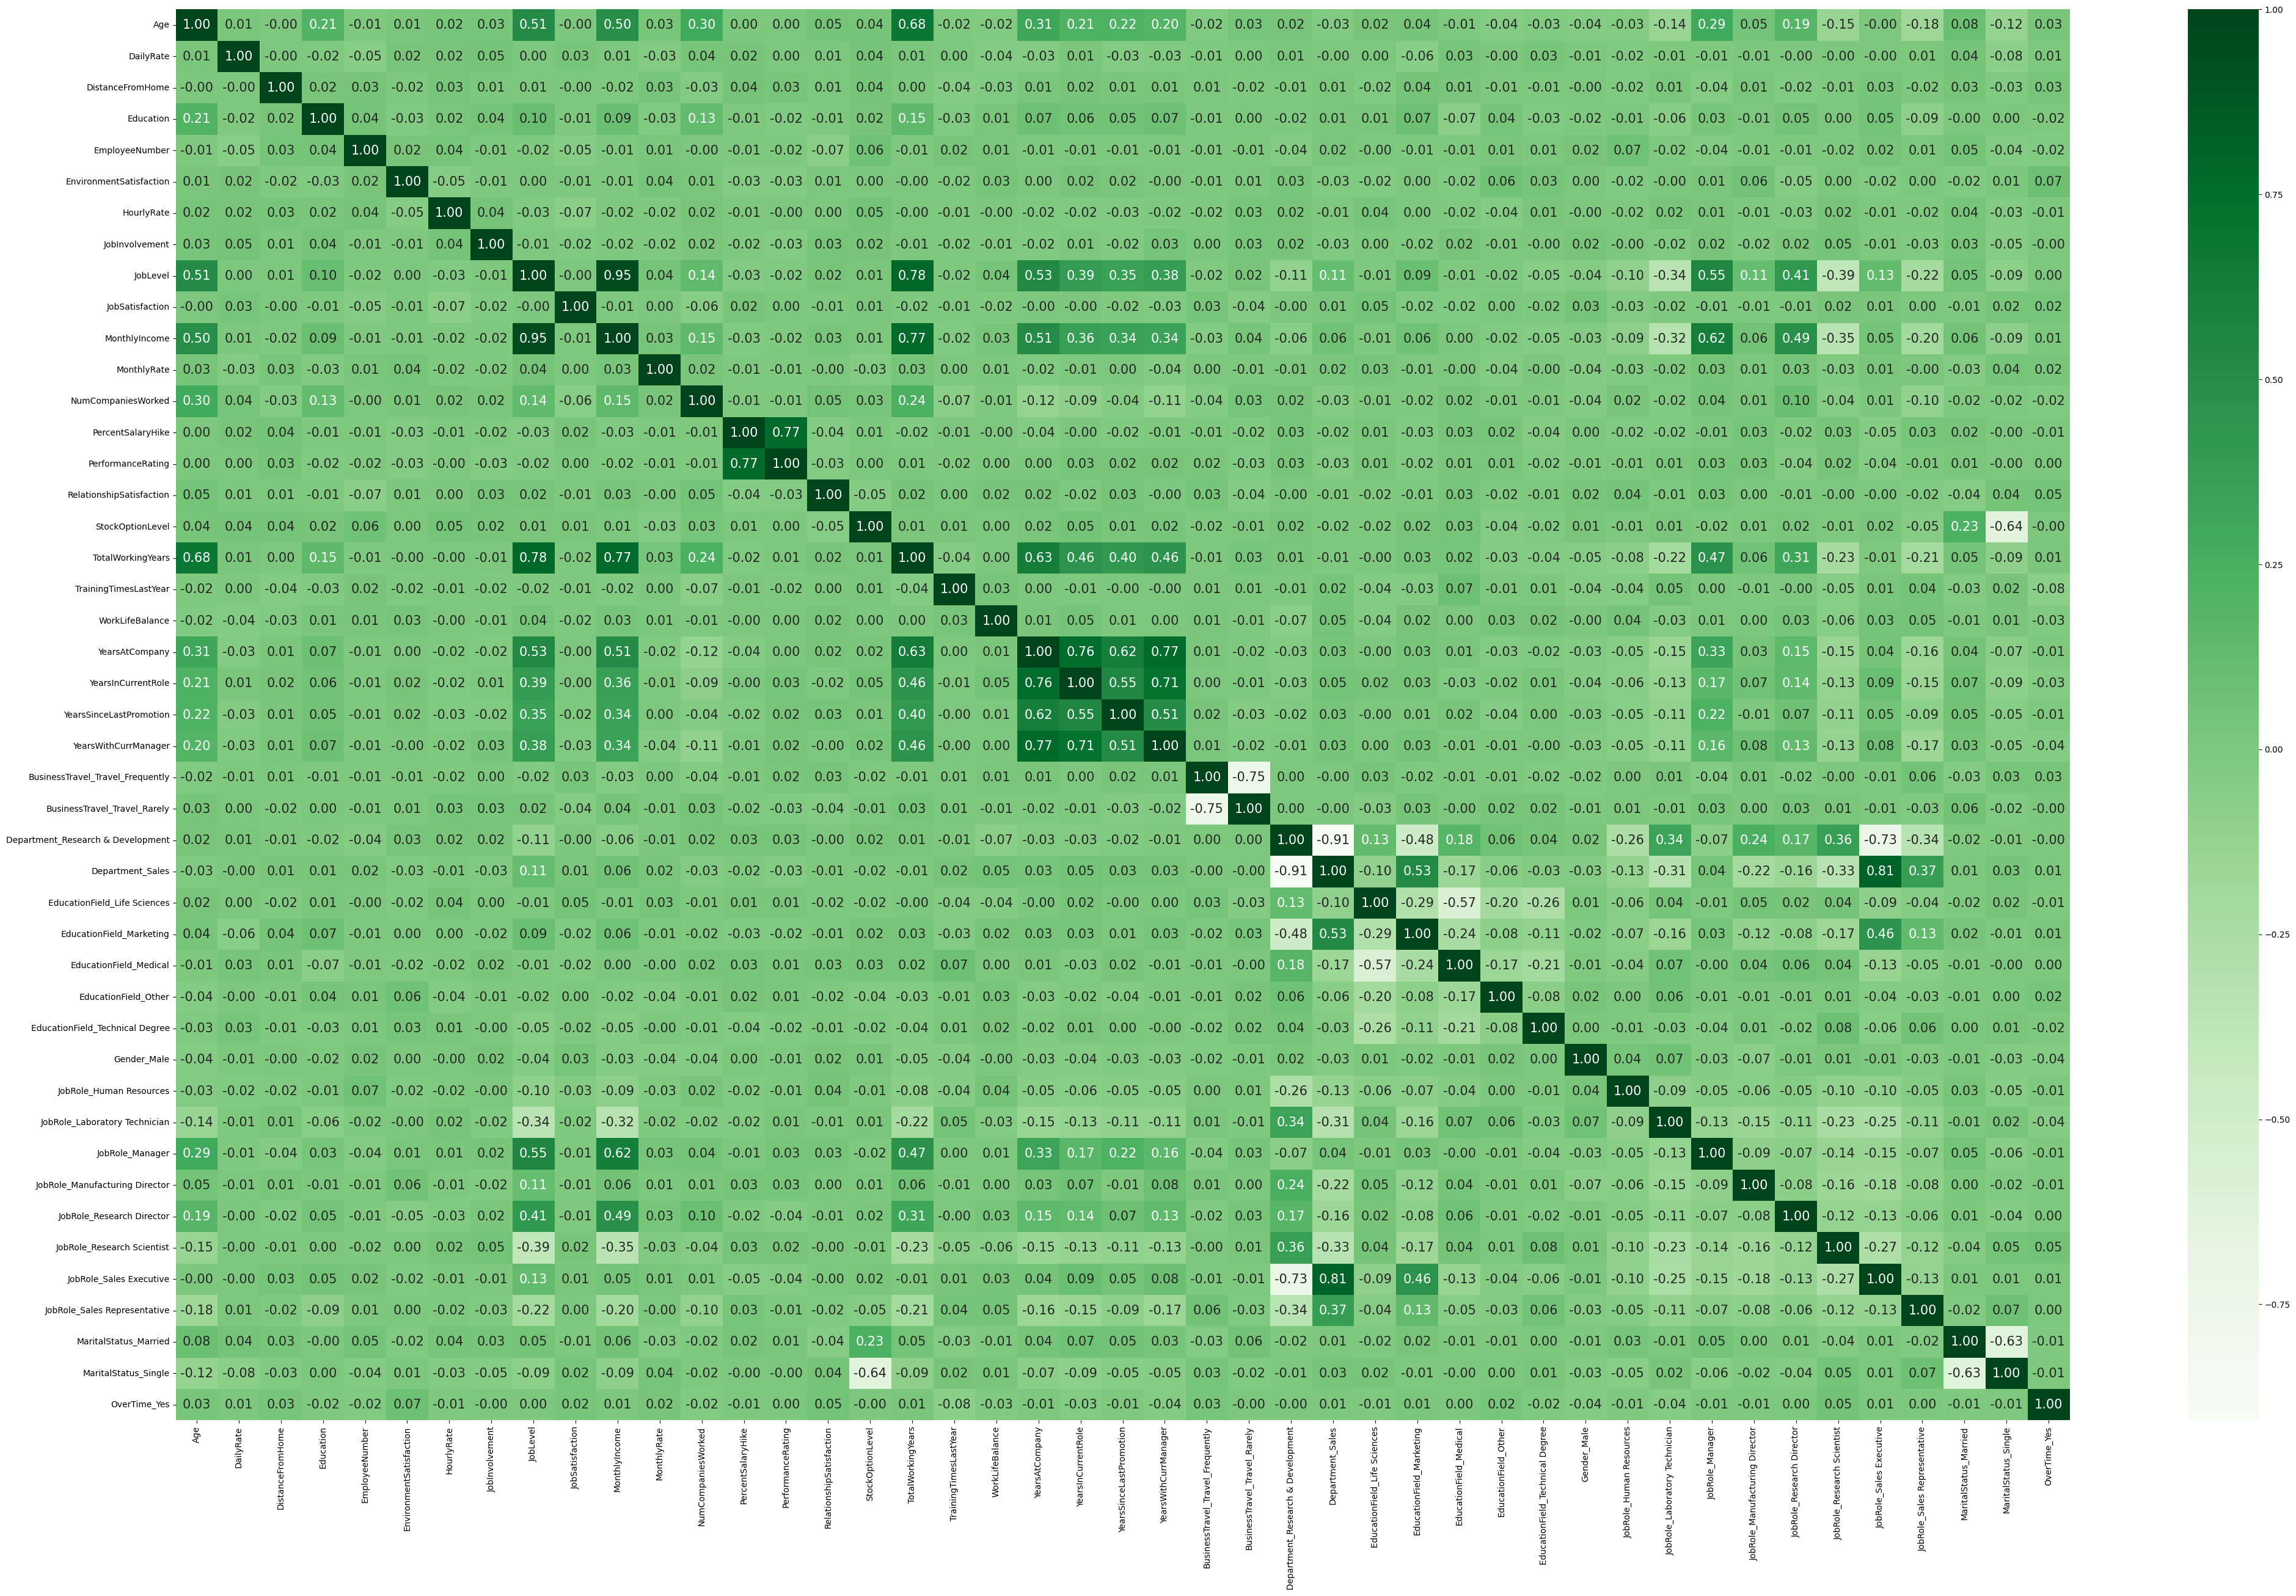

In [433]:
corr = df_new.corr()
plt.figure(figsize=(50,30))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

- **Both (Department_Research & Development and Department_Sales) and (JobLevel and MonthelyIncome)** basically concludes the 

same insights so 2 of the 4 columns can be dropped to avoid noise in our model

In [434]:
df_new.drop(['Department_Research & Development','JobLevel'],axis=1,inplace=True)

# **Split Data**

In [435]:
train=df_new.iloc[:1058,:]
test=df_new.iloc[1059:,:]


In [436]:
from sklearn.model_selection import train_test_split
X = train
y = train_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 0)

# **Model Training**

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Random Forest Classifier

In [438]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8820754716981132

              precision    recall  f1-score   support



           0       0.88      0.99      0.94       182

           1       0.86      0.20      0.32        30



    accuracy                           0.88       212

   macro avg       0.87      0.60      0.63       212

weighted avg       0.88      0.88      0.85       212




## Logistic Regression

In [441]:
lr = LogisticRegression().fit(X_train,y_train)
model_predictions = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8632075471698113

              precision    recall  f1-score   support



           0       0.87      0.99      0.93       182

           1       0.67      0.07      0.12        30



    accuracy                           0.86       212

   macro avg       0.77      0.53      0.52       212

weighted avg       0.84      0.86      0.81       212




## K-Neighbors Classifier

In [442]:
kn = KNeighborsClassifier().fit(X_train,y_train)
model_predictions = kn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8254716981132075

              precision    recall  f1-score   support



           0       0.86      0.95      0.90       182

           1       0.18      0.07      0.10        30



    accuracy                           0.83       212

   macro avg       0.52      0.51      0.50       212

weighted avg       0.76      0.83      0.79       212




## SVC

In [443]:
svc = SVC().fit(X_train,y_train)
model_predictions = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8584905660377359

              precision    recall  f1-score   support



           0       0.86      1.00      0.92       182

           1       0.00      0.00      0.00        30



    accuracy                           0.86       212

   macro avg       0.43      0.50      0.46       212

weighted avg       0.74      0.86      0.79       212


